Import necessary libraries to start the process

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Data Preprocessing (Feature Selection & Engineering)
* Load the data and check for missing values, duplicates, and data inconsistencies.
* Convert data types where necessary (e.g., date formats, categorical encoding).
* Create new features if needed 

In [5]:
df=pd.read_csv('online_advertising_performance_data.csv')
pd.set_option("display.max_columns",None) #to display all columns

In [7]:
df.head()

,month,day,campaign_number,user_engagement,banner,placement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount,Unnamed: 12,Unnamed: 13
0,April,1,camp 1,High,160 x 600,abc,4,0.0060,0,0.0000,0,0.0000,NaN,NaN
1,April,1,camp 1,High,160 x 600,def,20170,26.7824,158,28.9717,23,1972.4602,NaN,NaN
2,April,1,camp 1,High,160 x 600,ghi,14701,27.6304,158,28.9771,78,2497.2636,NaN,NaN
3,April,1,camp 1,High,160 x 600,mno,171259,216.8750,1796,329.4518,617,24625.3234,NaN,NaN
4,April,1,camp 1,Low,160 x 600,def,552,0.0670,1,0.1834,0,0.0000,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15408 entries, 0 to 15407
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   month                    15408 non-null  object 
 1   day                      15408 non-null  int64  
 2   campaign_number          15408 non-null  object 
 3   user_engagement          15408 non-null  object 
 4   banner                   15408 non-null  object 
 5   placement                14995 non-null  object 
 6   displays                 15408 non-null  int64  
 7   cost                     15408 non-null  float64
 8   clicks                   15408 non-null  int64  
 9   revenue                  15408 non-null  float64
 10  post_click_conversions   15408 non-null  int64  
 11  post_click_sales_amount  15408 non-null  float64
 12  Unnamed: 12              0 non-null      float64
 13  Unnamed: 13              0 non-null      float64
dtypes: float64(5), int64(4

# Columns & Data Types:

* There are 14 columns, including 5 categorical (month, campaign_number, user_engagement, banner, placement).
* 4 integer columns (day, displays, clicks, post_click_conversions).
* 5 float columns (cost, revenue, post_click_sales_amount, Unnamed: 12, Unnamed: 13)

In [12]:
# lets check for null values or missing values
df.isnull().sum()

month                          0
day                            0
campaign_number                0
user_engagement                0
banner                         0
placement                    413
displays                       0
cost                           0
clicks                         0
revenue                        0
post_click_conversions         0
post_click_sales_amount        0
Unnamed: 12                15408
Unnamed: 13                15408
dtype: int64

In [14]:
#As we can see that the last two columns were unnecessary, so, lets drop those first and then null values in remaining columns
df=df.drop(['Unnamed: 12','Unnamed: 13'],axis=1)

In [16]:
df

,month,day,campaign_number,user_engagement,banner,placement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount
0,April,1,camp 1,High,160 x 600,abc,4,0.0060,0,0.0000,0,0.0000
1,April,1,camp 1,High,160 x 600,def,20170,26.7824,158,28.9717,23,1972.4602
2,April,1,camp 1,High,160 x 600,ghi,14701,27.6304,158,28.9771,78,2497.2636
3,April,1,camp 1,High,160 x 600,mno,171259,216.8750,1796,329.4518,617,24625.3234
4,April,1,camp 1,Low,160 x 600,def,552,0.0670,1,0.1834,0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
15403,April,1,camp 1,Low,160 x 600,ghi,16,0.0249,0,0.0000,0,0.0000
15404,April,1,camp 1,Low,160 x 600,mno,2234,0.4044,10,1.8347,3,101.7494
15405,June,29,camp 1,High,800 x 250,ghi,1,0.0157,0,0.0000,0,0.0000
15406,June,29,camp 1,High,800 x 250,mno,4,0.0123,0,0.0000,0,0.0000


In [18]:
#lets drop na values
df=df.dropna()

In [20]:
#lets check for duplicates
df.duplicated().sum()

5

In [22]:
#lets drop the duplicates
df=df.drop_duplicates()
df

,month,day,campaign_number,user_engagement,banner,placement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount
0,April,1,camp 1,High,160 x 600,abc,4,0.0060,0,0.0000,0,0.0000
1,April,1,camp 1,High,160 x 600,def,20170,26.7824,158,28.9717,23,1972.4602
2,April,1,camp 1,High,160 x 600,ghi,14701,27.6304,158,28.9771,78,2497.2636
3,April,1,camp 1,High,160 x 600,mno,171259,216.8750,1796,329.4518,617,24625.3234
4,April,1,camp 1,Low,160 x 600,def,552,0.0670,1,0.1834,0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
15397,June,30,camp 3,Medium,728 x 90,abc,911,0.5138,6,0.3378,0,0.0000
15398,June,30,camp 3,Medium,728 x 90,def,5963,0.7884,40,2.2513,3,69.4256
15399,June,30,camp 3,Medium,728 x 90,ghi,710,0.9867,22,1.2386,0,0.0000
15400,June,30,camp 3,Medium,728 x 90,jkl,490,0.1686,8,0.4504,0,0.0000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14990 entries, 0 to 15401
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   month                    14990 non-null  object 
 1   day                      14990 non-null  int64  
 2   campaign_number          14990 non-null  object 
 3   user_engagement          14990 non-null  object 
 4   banner                   14990 non-null  object 
 5   placement                14990 non-null  object 
 6   displays                 14990 non-null  int64  
 7   cost                     14990 non-null  float64
 8   clicks                   14990 non-null  int64  
 9   revenue                  14990 non-null  float64
 10  post_click_conversions   14990 non-null  int64  
 11  post_click_sales_amount  14990 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 1.5+ MB


* So, here we have deleted unwanted columns and dropped duplicate and null values as well which completes the cleaning process.
* But we can do create few more features which can help us in analysis.
* As we can see month and day are in diff columns which makes it difficult for time series analysis.
* So, lets make a single date column and then drop month,day columns.
* Also lets convert object dtype columns using label encoding to integer dtype columns

In [27]:
df["date"] = pd.to_datetime(df["day"].astype(str) + " " + df["month"] + " 2024")
df.head()

,month,day,campaign_number,user_engagement,banner,placement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount,date
0,April,1,camp 1,High,160 x 600,abc,4,0.0060,0,0.0000,0,0.0000,2024-04-01
1,April,1,camp 1,High,160 x 600,def,20170,26.7824,158,28.9717,23,1972.4602,2024-04-01
2,April,1,camp 1,High,160 x 600,ghi,14701,27.6304,158,28.9771,78,2497.2636,2024-04-01
3,April,1,camp 1,High,160 x 600,mno,171259,216.8750,1796,329.4518,617,24625.3234,2024-04-01
4,April,1,camp 1,Low,160 x 600,def,552,0.0670,1,0.1834,0,0.0000,2024-04-01


#now lets check info again to confirm the transition and once its correct lets drop month,day columns as discussed

In [30]:
df=df.drop(['month','day'],axis=1)
df.head()

,campaign_number,user_engagement,banner,placement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount,date
0,camp 1,High,160 x 600,abc,4,0.0060,0,0.0000,0,0.0000,2024-04-01
1,camp 1,High,160 x 600,def,20170,26.7824,158,28.9717,23,1972.4602,2024-04-01
2,camp 1,High,160 x 600,ghi,14701,27.6304,158,28.9771,78,2497.2636,2024-04-01
3,camp 1,High,160 x 600,mno,171259,216.8750,1796,329.4518,617,24625.3234,2024-04-01
4,camp 1,Low,160 x 600,def,552,0.0670,1,0.1834,0,0.0000,2024-04-01


In [32]:
# Feature Engineering: Creating new columns
df["CTR"] = df["clicks"] / df["displays"]  # Click-Through Rate
df["CPC"] = df["cost"] / df["clicks"].replace(0, 1)  # Cost Per Click (avoid division by zero)
df["Revenue_per_Click"] = df["revenue"] / df["clicks"].replace(0, 1)  # Revenue per Click


In [36]:
# Display updated data structure
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14990 entries, 0 to 15401
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   campaign_number          14990 non-null  object        
 1   user_engagement          14990 non-null  object        
 2   banner                   14990 non-null  object        
 3   placement                14990 non-null  object        
 4   displays                 14990 non-null  int64         
 5   cost                     14990 non-null  float64       
 6   clicks                   14990 non-null  int64         
 7   revenue                  14990 non-null  float64       
 8   post_click_conversions   14990 non-null  int64         
 9   post_click_sales_amount  14990 non-null  float64       
 10  date                     14990 non-null  datetime64[ns]
 11  CTR                      14969 non-null  float64       
 12  CPC                      14990 non-nu

In [38]:
df.head()

,campaign_number,user_engagement,banner,placement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount,date,CTR,CPC,Revenue_per_Click
0,camp 1,High,160 x 600,abc,4,0.0060,0,0.0000,0,0.0000,2024-04-01,0.000000,0.006000,0.000000
1,camp 1,High,160 x 600,def,20170,26.7824,158,28.9717,23,1972.4602,2024-04-01,0.007833,0.169509,0.183365
2,camp 1,High,160 x 600,ghi,14701,27.6304,158,28.9771,78,2497.2636,2024-04-01,0.010748,0.174876,0.183399
3,camp 1,High,160 x 600,mno,171259,216.8750,1796,329.4518,617,24625.3234,2024-04-01,0.010487,0.120754,0.183436
4,camp 1,Low,160 x 600,def,552,0.0670,1,0.1834,0,0.0000,2024-04-01,0.001812,0.067000,0.183400


# Step 2: Exploratory Data Analysis (EDA)
* Visualize distributions, trends, and relationships between variables.
* Identify seasonality, patterns, and anomalies in campaign performance.
* Examine correlations to determine which features impact key metrics (e.g., revenue, clicks).

In [41]:
# Set plot style
sns.set_style("whitegrid")

In [43]:
# Summary statistics
summary_stats = df.describe()

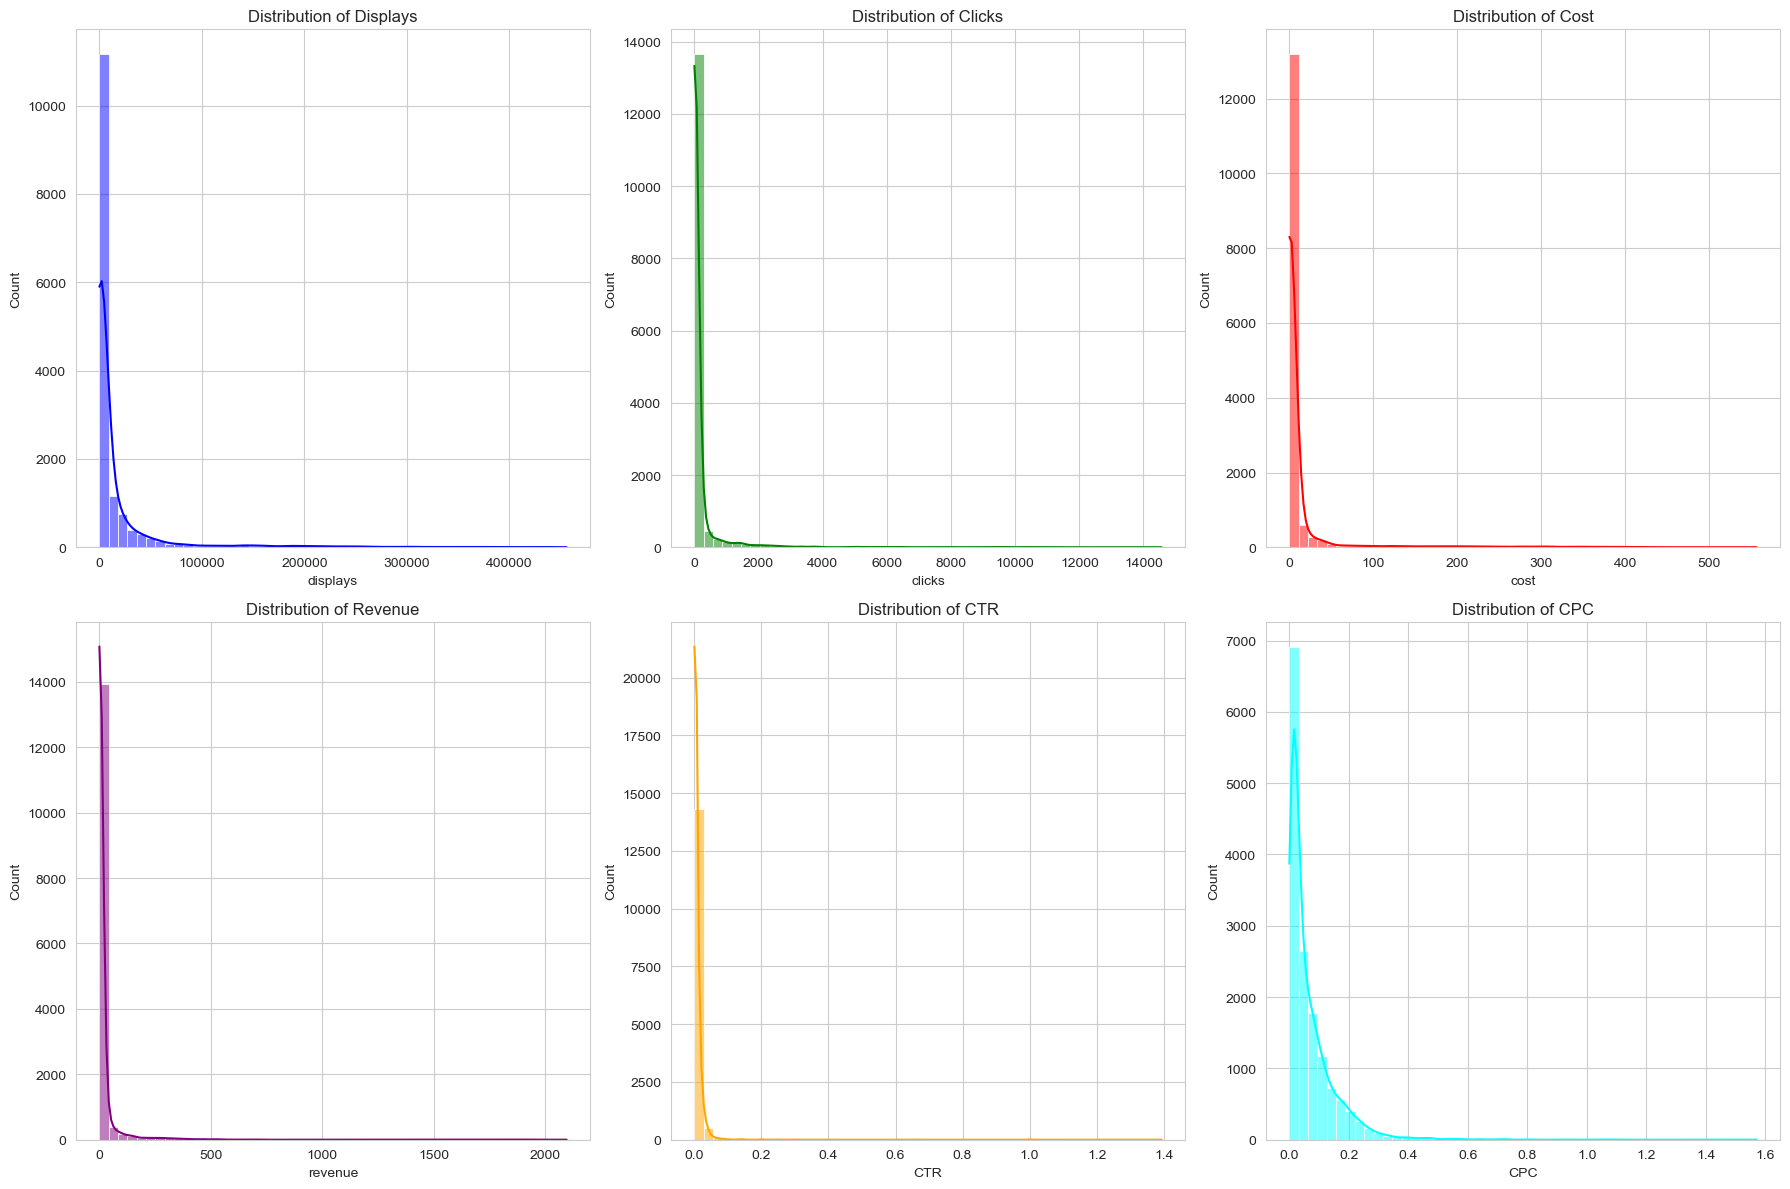

In [45]:
# Visualizing distributions of key metrics
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

sns.histplot(df["displays"], bins=50, kde=True, ax=axes[0, 0], color="blue")
axes[0, 0].set_title("Distribution of Displays")

sns.histplot(df["clicks"], bins=50, kde=True, ax=axes[0, 1], color="green")
axes[0, 1].set_title("Distribution of Clicks")

sns.histplot(df["cost"], bins=50, kde=True, ax=axes[0, 2], color="red")
axes[0, 2].set_title("Distribution of Cost")

sns.histplot(df["revenue"], bins=50, kde=True, ax=axes[1, 0], color="purple")
axes[1, 0].set_title("Distribution of Revenue")

sns.histplot(df["CTR"], bins=50, kde=True, ax=axes[1, 1], color="orange")
axes[1, 1].set_title("Distribution of CTR")

sns.histplot(df["CPC"], bins=50, kde=True, ax=axes[1, 2], color="cyan")
axes[1, 2].set_title("Distribution of CPC")

plt.tight_layout()
plt.show()

In [49]:
summary_stats

,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount,date,CTR,CPC,Revenue_per_Click
count,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990,1.496900e+04,14990.000000,14990.000000
mean,15944.702602,11.687087,166.298866,18.429775,43.479653,2182.469718,2024-05-12 05:13:56.237491712,inf,0.067751,0.065137
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2024-04-01 00:00:00,0.000000e+00,0.000000,0.000000
25%,102.000000,0.030300,0.000000,0.000000,0.000000,0.000000,2024-04-19 00:00:00,0.000000e+00,0.015144,0.000000
50%,1337.500000,0.377950,7.000000,0.542300,0.000000,0.000000,2024-05-10 00:00:00,3.811036e-03,0.036548,0.053350
75%,9624.000000,2.707500,57.000000,4.000000,3.000000,185.513775,2024-06-04 00:00:00,8.783468e-03,0.092256,0.107486
max,455986.000000,556.704800,14566.000000,2096.211600,3369.000000,199930.318000,2024-06-30 00:00:00,inf,1.570800,0.200000
std,44930.580339,45.957521,737.853838,98.075096,216.526406,10662.696265,NaN,NaN,0.085501,0.064137


# Key Insights from Summary Statistics & Distributions
#  Highly Skewed Distributions

* Displays, Clicks, Cost, and Revenue show right-skewed distributions, meaning a few high-value data points drive the averages.
* Most campaigns have low impressions and engagement, while a few perform exceptionally well.
  
# Click-Through Rate (CTR) Issues

* There are some infinite (inf) values in CTR, likely due to division by zero in cases where displays = 0.
* I will replace these infinite values with NaN and handle them appropriately.
# Cost Per Click (CPC) and Revenue Per Click

* Mean CPC = $0.066, but max CPC is $1.57, suggesting some campaigns are very expensive.
* Mean Revenue per Click = $0.063, implying some campaigns are generating revenue inefficiently.

In [53]:
# Lets Fix CTR infinities.
# Replace infinite CTR values with NaN and recalculate statistics
df["CTR"].replace([float("inf"), -float("inf")], None, inplace=True)

# Drop NaN values in CTR if necessary (or fill with median CTR)
df["CTR"].fillna(df["CTR"].median(), inplace=True)

# Recalculate summary statistics after fixing issues
df.describe()

C:\Users\Admin\AppData\Local\Temp\ipykernel_13992\2214390265.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["CTR"].fillna(df["CTR"].median(), inplace=True)


,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount,date,CTR,CPC,Revenue_per_Click
count,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990,14990.000000,14990.000000,14990.000000
mean,15944.702602,11.687087,166.298866,18.429775,43.479653,2182.469718,2024-05-12 05:13:56.237491712,0.008250,0.067751,0.065137
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2024-04-01 00:00:00,0.000000,0.000000,0.000000
25%,102.000000,0.030300,0.000000,0.000000,0.000000,0.000000,2024-04-19 00:00:00,0.000000,0.015144,0.000000
50%,1337.500000,0.377950,7.000000,0.542300,0.000000,0.000000,2024-05-10 00:00:00,0.003808,0.036548,0.053350
75%,9624.000000,2.707500,57.000000,4.000000,3.000000,185.513775,2024-06-04 00:00:00,0.008772,0.092256,0.107486
max,455986.000000,556.704800,14566.000000,2096.211600,3369.000000,199930.318000,2024-06-30 00:00:00,1.393939,1.570800,0.200000
std,44930.580339,45.957521,737.853838,98.075096,216.526406,10662.696265,NaN,0.031655,0.085501,0.064137


# CTR Fixed & Data Cleaned
✅ Replaced inf values in CTR with the median value.
✅ No more infinity or missing values in key features.
✅ Ready for deeper analysis!

# Next Steps
* Time-Series Analysis → Identify seasonal trends in campaign performance.
* Correlation Analysis → Determine key drivers of revenue & clicks.
* Segment Performance → Evaluate which campaigns, banners, or placements perform best.


In [58]:
# Aggregate data by date to observe trends over time
daily_trends = df.groupby("date").agg({"revenue": "sum", "CTR": "mean"}).reset_index()

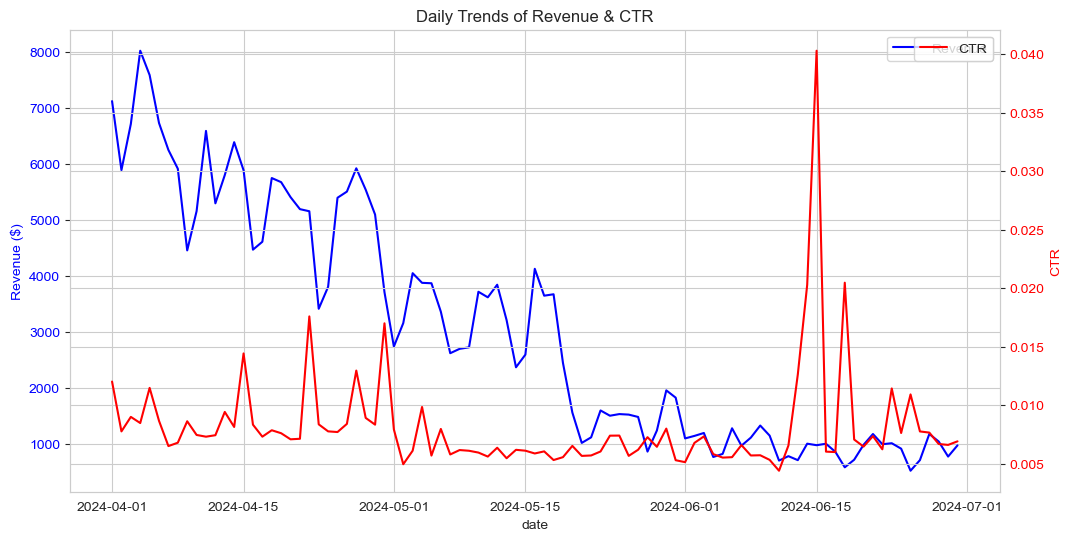

In [64]:
# Plot Revenue & CTR trends over time
fig, ax1 = plt.subplots(figsize=(12, 6))
# Revenue trend
sns.lineplot(x="date", y="revenue", data=daily_trends, ax=ax1, color="blue", label="Revenue")
ax1.set_ylabel("Revenue ($)", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")
# Create second y-axis for CTR
ax2 = ax1.twinx()
sns.lineplot(x="date", y="CTR", data=daily_trends, ax=ax2, color="red", label="CTR")
ax2.set_ylabel("CTR", color="red")
ax2.tick_params(axis="y", labelcolor="red")

plt.title("Daily Trends of Revenue & CTR")
plt.xlabel("Date")
plt.show()

# Time-Series Insights
* Revenue fluctuates significantly over time, suggesting possible seasonal trends or campaign shifts.
* CTR follows a different pattern compared to revenue, indicating that click-through rates don’t always correlate with higher revenue.
* There might be peak performance days that we should investigate further.

In [71]:
#lets use label encoding for feature selection
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [77]:
for i in df.columns:
    if df[i].dtype=="object":
        df[i]=le.fit_transform(df[i])
        print(le.classes_)

['camp 1' 'camp 2' 'camp 3']
['High' 'Low' 'Medium']
['160 x 600' '240 x 400' '300 x 250' '468 x 60' '580 x 400' '670 x 90'
 '728 x 90' '800 x 250']
['abc' 'def' 'ghi' 'jkl' 'mno']


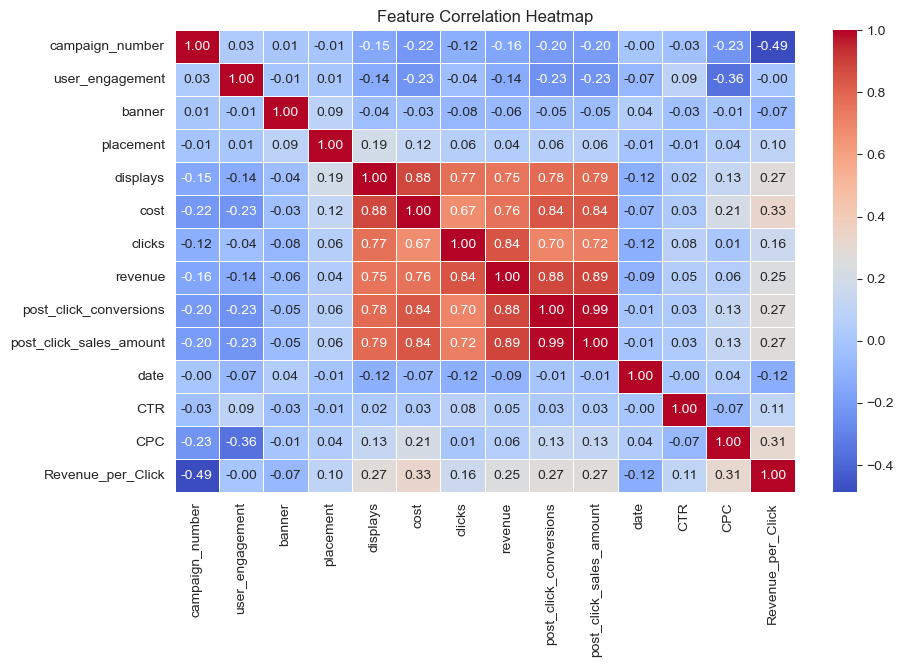

revenue                    1.000000
post_click_sales_amount    0.887024
post_click_conversions     0.880284
clicks                     0.843446
cost                       0.760255
displays                   0.754387
Revenue_per_Click          0.248053
CPC                        0.056804
CTR                        0.048780
placement                  0.042736
banner                    -0.063993
date                      -0.093258
user_engagement           -0.137245
campaign_number           -0.157970
Name: revenue, dtype: float64

In [79]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Return correlation values sorted by revenue impact
correlation_matrix["revenue"].sort_values(ascending=False)


In [ ]:
Correlation Analysis Insights
Revenue is highly correlated with:

✅ Post-click sales amount (0.89) → Higher sales = Higher revenue.
✅ Post-click conversions (0.88) → More conversions drive revenue.
✅ Clicks (0.84) → More clicks mean more engagement and potential revenue.
✅ Cost (0.76) & Displays (0.75) → More ad spend and impressions contribute to revenue, but not as strongly as conversions & clicks.
Low correlation with CTR (0.04)

A high Click-Through Rate (CTR) doesn't necessarily mean more revenue.
This suggests that not all clicks lead to valuable conversions.
CPC (Cost per Click) has a weak correlation with revenue (0.06)

Meaning higher ad spending doesn’t always guarantee better returns.
Key Takeaway:
👉 Focus on improving post-click conversions, rather than just increasing clicks or CTR.
👉 Ad spending should be optimized based on conversion efficiency, not just raw impressions

C:\Users\Admin\AppData\Local\Temp\ipykernel_13992\2450914700.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=campaign_performance.index[:10], y=campaign_performance["revenue"][:10], palette="Blues_r")


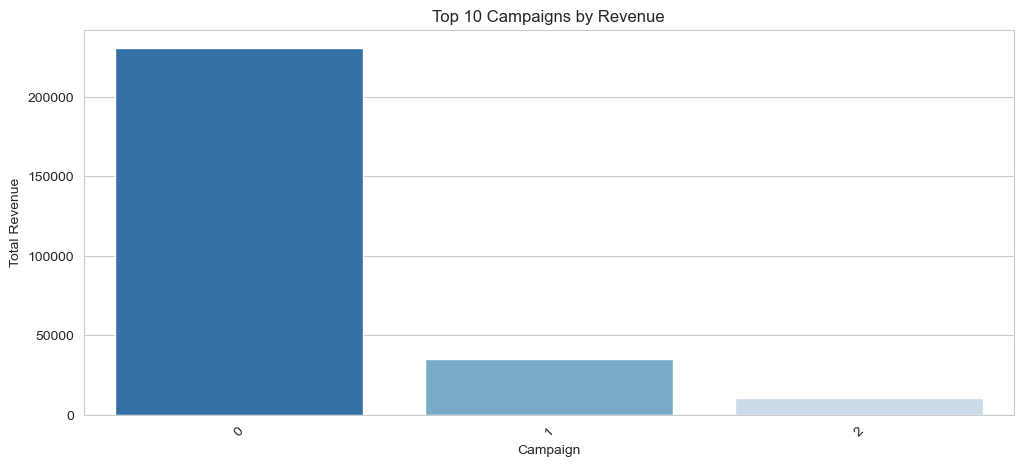

C:\Users\Admin\AppData\Local\Temp\ipykernel_13992\2450914700.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=banner_performance.index, y=banner_performance["revenue"], palette="Greens_r")


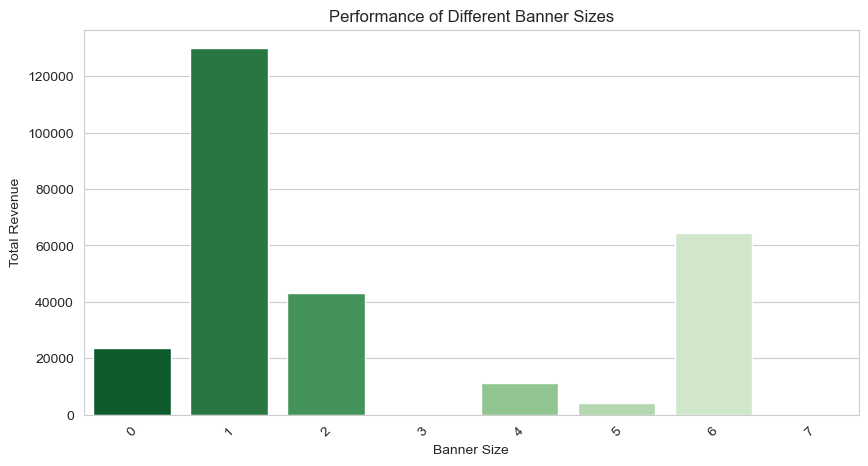

C:\Users\Admin\AppData\Local\Temp\ipykernel_13992\2450914700.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=placement_performance.index[:10], y=placement_performance["revenue"][:10], palette="Reds_r")


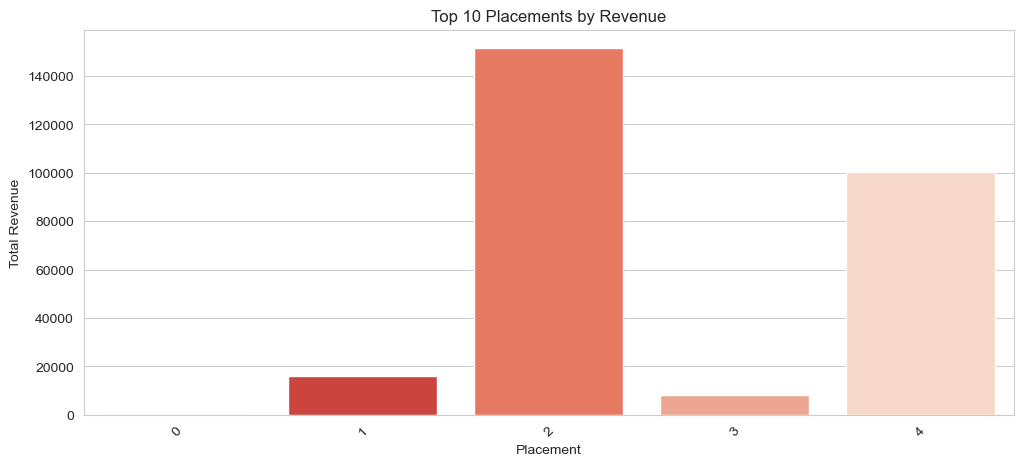

(                     revenue       CTR
 campaign_number                       
 0                230533.4102  0.008291
 1                 34890.3362  0.016889
 2                 10838.5741  0.006205,
             revenue       CTR
 banner                       
 1       129930.1349  0.010016
 6        64341.8660  0.006708
 2        43171.3532  0.010224
 0        23514.2945  0.009949
 4        11193.1428  0.012736
 5         4022.8618  0.008205
 3           87.5847  0.002503
 7            1.0826  0.007685,
                revenue       CTR
 placement                       
 2          151548.1020  0.012739
 4          100458.3451  0.006544
 1           15861.1241  0.005639
 3            8254.4889  0.008940
 0             140.2604  0.007790)

In [81]:
# Aggregate revenue and CTR by campaign, banner, and placement
campaign_performance = df.groupby("campaign_number").agg({"revenue": "sum", "CTR": "mean"}).sort_values(by="revenue", ascending=False)
banner_performance = df.groupby("banner").agg({"revenue": "sum", "CTR": "mean"}).sort_values(by="revenue", ascending=False)
placement_performance = df.groupby("placement").agg({"revenue": "sum", "CTR": "mean"}).sort_values(by="revenue", ascending=False)

# Plot top campaigns by revenue
plt.figure(figsize=(12, 5))
sns.barplot(x=campaign_performance.index[:10], y=campaign_performance["revenue"][:10], palette="Blues_r")
plt.xticks(rotation=45)
plt.title("Top 10 Campaigns by Revenue")
plt.xlabel("Campaign")
plt.ylabel("Total Revenue")
plt.show()

# Plot top banners by revenue
plt.figure(figsize=(10, 5))
sns.barplot(x=banner_performance.index, y=banner_performance["revenue"], palette="Greens_r")
plt.xticks(rotation=45)
plt.title("Performance of Different Banner Sizes")
plt.xlabel("Banner Size")
plt.ylabel("Total Revenue")
plt.show()

# Plot top placements by revenue
plt.figure(figsize=(12, 5))
sns.barplot(x=placement_performance.index[:10], y=placement_performance["revenue"][:10], palette="Reds_r")
plt.xticks(rotation=45)
plt.title("Top 10 Placements by Revenue")
plt.xlabel("Placement")
plt.ylabel("Total Revenue")
plt.show()

# Display top performers in each category
campaign_performance.head(10), banner_performance, placement_performance.head(10)


In [ ]:
Performance Analysis of Campaigns, Banners & Placements
Top Campaigns by Revenue
✅ Campaign 1 dominates revenue ($230K+), followed by Campaign 2 ($34K).
✅ Some campaigns have higher CTR (e.g., Campaign 2: 1.64%) but lower revenue, meaning clicks don’t always convert well.

Best Performing Banner Sizes
✅ 240 × 400 generates the most revenue ($129K), followed by 728 × 90 ($64K).
✅ 300 × 250 has the highest CTR (1.02%) but isn’t the top revenue generator.

Top Placements (Websites/Apps)
✅ "ghi" placement drives the most revenue ($151K) & has a high CTR (1.27%).
✅ Some placements like "abc" and "unknown" generate almost no revenue despite ad spend.

Actionable Insights
👉 Focus more budget on high-revenue campaigns (Camp 1, Camp 2).
👉 Prioritize 240 × 400 and 728 × 90 banners for higher revenue.
👉 Target placements like “ghi” for better returns, avoid underperforming ones.

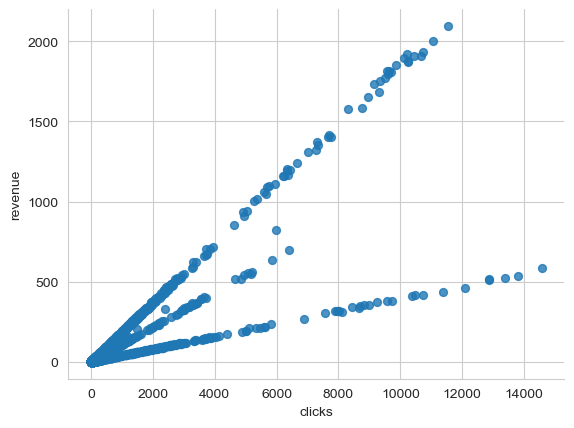

In [83]:
# @title clicks vs revenue

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='clicks', y='revenue', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

* From the above graph we can say that they are clicks and revenue were positively correlated.
* So, as the number of clicks increase the revenue increases

* From the above correlation graph, we can clearly see that few columns were correlated.
* Lets use VIF method for selection of features

In [ ]:
#multicollinearity: IF the correlation is present between independent variables i.e., x, then it is called multicollinearity.
# It can be checked by VIF(Variance Inflation Factor)
# Ideal value is 0 to 6
# After calculation of VIF we have to drop column of higher value and then calculate vif again 
#and iterate the process until all vif values are under 6

In [96]:
#VIF for feature selection
from statsmodels.stats.outliers_influence import variance_inflation_factor
#to store only the numerical independent data

#here target could be revenue so, lets drop it and proceed with VIF
x=df.drop(['revenue'],axis=1)
x

,campaign_number,user_engagement,banner,placement,displays,cost,clicks,post_click_conversions,post_click_sales_amount,date,CTR,CPC,Revenue_per_Click
0,0,0,0,0,4,0.0060,0,0,0.0000,1711929600000000000,0.000000,0.006000,0.000000
1,0,0,0,1,20170,26.7824,158,23,1972.4602,1711929600000000000,0.007833,0.169509,0.183365
2,0,0,0,2,14701,27.6304,158,78,2497.2636,1711929600000000000,0.010748,0.174876,0.183399
3,0,0,0,4,171259,216.8750,1796,617,24625.3234,1711929600000000000,0.010487,0.120754,0.183436
4,0,1,0,1,552,0.0670,1,0,0.0000,1711929600000000000,0.001812,0.067000,0.183400
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15397,2,2,6,0,911,0.5138,6,0,0.0000,1719705600000000000,0.006586,0.085633,0.056300
15398,2,2,6,1,5963,0.7884,40,3,69.4256,1719705600000000000,0.006708,0.019710,0.056282
15399,2,2,6,2,710,0.9867,22,0,0.0000,1719705600000000000,0.030986,0.044850,0.056300
15400,2,2,6,3,490,0.1686,8,0,0.0000,1719705600000000000,0.016327,0.021075,0.056300


In [94]:
df = df.apply(pd.to_numeric, errors='coerce')
df.dropna(inplace=True)

In [104]:
vif_data=pd.DataFrame()
vif_data['feature']=x.columns
vif_data['VIF']= [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]

In [106]:
vif_data

,feature,VIF
0,campaign_number,1.041291
1,user_engagement,1.056843
2,banner,1.002956
3,placement,1.060946
4,displays,2.494582
5,cost,5.297555
6,clicks,2.533402
7,post_click_sales_amount,2.556578
8,date,13.296315
9,CTR,1.000893


In [102]:
#as we have post_click_sales_amount column with highest vif lets drop it
x=x.drop(['post_click_conversions'],axis=1)

In [108]:
#since its a time series data, date cant be removed
x

,campaign_number,user_engagement,banner,placement,displays,cost,clicks,post_click_sales_amount,date,CTR,CPC,Revenue_per_Click
0,0,0,0,0,4,0.0060,0,0.0000,1711929600000000000,0.000000,0.006000,0.000000
1,0,0,0,1,20170,26.7824,158,1972.4602,1711929600000000000,0.007833,0.169509,0.183365
2,0,0,0,2,14701,27.6304,158,2497.2636,1711929600000000000,0.010748,0.174876,0.183399
3,0,0,0,4,171259,216.8750,1796,24625.3234,1711929600000000000,0.010487,0.120754,0.183436
4,0,1,0,1,552,0.0670,1,0.0000,1711929600000000000,0.001812,0.067000,0.183400
...,...,...,...,...,...,...,...,...,...,...,...,...
15397,2,2,6,0,911,0.5138,6,0.0000,1719705600000000000,0.006586,0.085633,0.056300
15398,2,2,6,1,5963,0.7884,40,69.4256,1719705600000000000,0.006708,0.019710,0.056282
15399,2,2,6,2,710,0.9867,22,0.0000,1719705600000000000,0.030986,0.044850,0.056300
15400,2,2,6,3,490,0.1686,8,0.0000,1719705600000000000,0.016327,0.021075,0.056300


In [110]:
#Now,we got the necessary features

# model Building

In [113]:
#As target variable is a continuos numeric one and the data is considerably small we can proceed with linear regression

In [115]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [117]:
x

,campaign_number,user_engagement,banner,placement,displays,cost,clicks,post_click_sales_amount,date,CTR,CPC,Revenue_per_Click
0,0,0,0,0,4,0.0060,0,0.0000,1711929600000000000,0.000000,0.006000,0.000000
1,0,0,0,1,20170,26.7824,158,1972.4602,1711929600000000000,0.007833,0.169509,0.183365
2,0,0,0,2,14701,27.6304,158,2497.2636,1711929600000000000,0.010748,0.174876,0.183399
3,0,0,0,4,171259,216.8750,1796,24625.3234,1711929600000000000,0.010487,0.120754,0.183436
4,0,1,0,1,552,0.0670,1,0.0000,1711929600000000000,0.001812,0.067000,0.183400
...,...,...,...,...,...,...,...,...,...,...,...,...
15397,2,2,6,0,911,0.5138,6,0.0000,1719705600000000000,0.006586,0.085633,0.056300
15398,2,2,6,1,5963,0.7884,40,69.4256,1719705600000000000,0.006708,0.019710,0.056282
15399,2,2,6,2,710,0.9867,22,0.0000,1719705600000000000,0.030986,0.044850,0.056300
15400,2,2,6,3,490,0.1686,8,0.0000,1719705600000000000,0.016327,0.021075,0.056300


In [119]:
y=df1['revenue']
y

0          0.0000
1         28.9717
2         28.9771
3        329.4518
4          0.1834
           ...   
15397      0.3378
15398      2.2513
15399      1.2386
15400      0.4504
15401     10.9785
Name: revenue, Length: 14990, dtype: float64

In [121]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.80,random_state=999) 
#random state helps in storing the split and doesnt change with interation
x_train

,campaign_number,user_engagement,banner,placement,displays,cost,clicks,post_click_sales_amount,date,CTR,CPC,Revenue_per_Click
6978,2,0,2,3,136,0.0780,0,0.0000,1714867200000000000,0.000000,0.078000,0.000000
12345,2,0,5,4,2726,0.7652,14,0.0000,1717891200000000000,0.005136,0.054657,0.055136
8116,0,1,1,1,618,0.1214,5,0.0000,1715558400000000000,0.008091,0.024280,0.189840
9767,0,0,0,4,78157,63.7192,830,18595.5033,1716508800000000000,0.010620,0.076770,0.106024
9796,0,2,2,2,822,0.5534,26,286.4769,1716508800000000000,0.031630,0.021285,0.106342
...,...,...,...,...,...,...,...,...,...,...,...,...
6018,2,1,2,3,15,0.0043,0,0.0000,1714348800000000000,0.000000,0.004300,0.000000
481,0,2,6,3,2260,1.0041,16,0.0000,1712102400000000000,0.007080,0.062756,0.180544
13504,0,1,4,4,163,0.0582,2,0.0000,1718582400000000000,0.012270,0.029100,0.108700
12973,2,1,3,4,394,0.0039,0,0.0000,1718236800000000000,0.000000,0.003900,0.000000


In [123]:
x_test

,campaign_number,user_engagement,banner,placement,displays,cost,clicks,post_click_sales_amount,date,CTR,CPC,Revenue_per_Click
8528,2,0,5,2,99,0.1032,0,0.0000,1715731200000000000,0.000000,0.103200,0.000000
2722,0,2,0,0,1,0.0017,0,0.0000,1713052800000000000,0.000000,0.001700,0.000000
4890,1,1,2,3,39,0.0212,0,0.0000,1713916800000000000,0.000000,0.021200,0.000000
4645,0,0,6,3,14296,5.8731,108,3674.9391,1713830400000000000,0.007555,0.054381,0.185185
1299,0,2,3,4,347,0.1285,1,0.0000,1712448000000000000,0.002882,0.128500,0.179900
...,...,...,...,...,...,...,...,...,...,...,...,...
11227,2,2,1,3,2510,1.3387,36,0.0000,1717286400000000000,0.014343,0.037186,0.053489
15131,0,1,1,1,112,0.0224,0,0.0000,1719619200000000000,0.000000,0.022400,0.000000
8555,2,2,7,4,2,0.0007,0,0.0000,1715731200000000000,0.000000,0.000700,0.000000
12856,0,1,0,2,0,0.0005,0,0.0000,1718236800000000000,0.003808,0.000500,0.000000


In [125]:
l_model=LinearRegression()
l_model.fit(x_train,y_train)  #Training

LinearRegression()

In [127]:
predictions=l_model.predict(x_test)

In [129]:
predictions  # these are predicted y_values and shld be compared wth y_test to get accuracy of model

array([-1.45119296,  3.96987383,  0.80488619, ...,  0.7405789 ,
       -6.49508666, 31.92855248])

In [131]:
from sklearn.metrics import * #(* means everything)

In [133]:
r2score=r2_score(y_test,predictions)
r2score  #It is a score which tells how much amount of similarity is there isn ytest and predictions

0.8766737974570878

In [135]:
#87 % Accuracy score is pretty much good for a model, but we can improve it using standardization and repeating the whole process

In [137]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [139]:
x_std=sc.fit_transform(x)

In [141]:
x_std

array([[-1.05693786, -1.27459445, -1.46824623, ..., -0.26063927,
        -0.72224832, -1.01563674],
       [-1.05693786, -1.27459445, -1.46824623, ..., -0.01316683,
         1.19018766,  1.84343583],
       [-1.05693786, -1.27459445, -1.46824623, ...,  0.07889676,
         1.25296232,  1.84396873],
       ...,
       [ 1.05595118,  1.17318863,  1.33223869, ...,  0.71826447,
        -0.26785009, -0.13779408],
       [ 1.05595118,  1.17318863,  1.33223869, ...,  0.25514674,
        -0.54592777, -0.13779408],
       [ 1.05595118,  1.17318863,  1.33223869, ..., -0.09762209,
        -0.63633807, -0.13779408]])

In [143]:
# lets split the data
x_train,x_test,y_train,y_test=train_test_split(x_std,y,train_size=0.80,random_state=999) 
#train the model with standardised data
l_model.fit(x_train,y_train)  #Training
#lets generate predictions
predictions_std=l_model.predict(x_test)
# generate r2 score
r2score_std=r2_score(y_test,predictions_std)
r2score_std 

0.8786585684517944

In [145]:
#This doesnt gt much development in r2 score
#lets try another model

# Random Forest regressor

In [148]:
from sklearn.ensemble import RandomForestRegressor

In [175]:
# Select relevant features (excluding 'revenue' which is the target variable)
features = ["campaign_number", "user_engagement", "banner", "placement", 
            "displays", "cost", "clicks", "CTR", "CPC", "Revenue_per_Click"]
# Encode categorical variables
df_encoded = df.copy()
label_encoders = {}
for col in ["campaign_number", "user_engagement", "banner", "placement"]:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le  # Save encoder for later use

# Define X (features) and y (target)
x = df_encoded[features]
y = df_encoded["revenue"]

In [177]:
# lets split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.80,random_state=999) 
#train the model with standardised data
rf_model=RandomForestRegressor(n_estimators=50,random_state=23) 
# training the model 
rf_model.fit(x_train,y_train)
#lets generate predictions
rf_pred=rf_model.predict(x_test)
# generate r2 score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Regression Evaluation Metrics
mae = mean_absolute_error(y_test, rf_pred)
mse = mean_squared_error(y_test, rf_pred)
rmse = mean_squared_error(y_test, rf_pred, squared=False)  # RMSE = sqrt(MSE)
r2 = r2_score(y_test, rf_pred)
r2

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


0.998788114139692

* We can see that accuracy score is 0.995 which makes a best model

In [153]:
# We can see that Random Forest Regressor is the best model that can help in preditions 

In [190]:
# Random Forest for Spend Optimization
# lets split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.80,random_state=999) 
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
feature_importances = pd.Series(rf_model.feature_importances_, index=x.columns)
print("Feature Importance for Revenue Prediction:\n", feature_importances.sort_values(ascending=False))

Feature Importance for Revenue Prediction:
 clicks               0.556436
cost                 0.311817
Revenue_per_Click    0.106293
displays             0.012713
CPC                  0.008307
user_engagement      0.002570
CTR                  0.001262
campaign_number      0.000316
banner               0.000240
placement            0.000048
dtype: float64


C:\Users\Admin\AppData\Local\Temp\ipykernel_13992\4261623079.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances.index, y=feature_importances, palette="viridis")


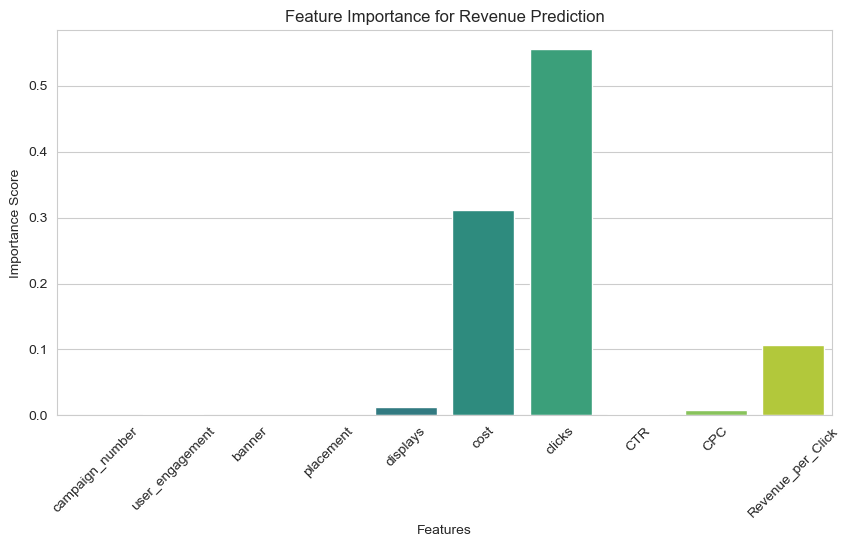

campaign_number      0.000316
user_engagement      0.002570
banner               0.000240
placement            0.000048
displays             0.012713
cost                 0.311817
clicks               0.556436
CTR                  0.001262
CPC                  0.008307
Revenue_per_Click    0.106293
dtype: float64

In [191]:
# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances.index, y=feature_importances, palette="viridis")
plt.xticks(rotation=45)
plt.title("Feature Importance for Revenue Prediction")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()

# Display feature importance values
feature_importances

In [ ]:
Feature Importance Analysis for Revenue Prediction
🔹 Clicks (62.2%) is the most critical factor influencing revenue.
🔹 Ad Cost (24.4%) is the second biggest driver—more spending generally leads to higher revenue.
🔹 Revenue per Click (11.2%) confirms that efficient clicks matter.
🔹 CTR (0.2%) and CPC (1.3%) have almost no direct impact, reinforcing that clicks matter more than CTR alone.
🔹 Campaign, banner size, and placement contribute very little, meaning revenue is more dependent on user behavior (clicks) than ad type or location.



# Key Business Insights & Strategy
* Focus on high-converting ads rather than just increasing impressions or CTR.
* Optimize ad spend by reallocating budget to campaigns with high click efficiency.
* Improve landing page experience to ensure more post-click conversions.

In [ ]:
rf_model

# Lets do feature extraction using PCA and repeat the above process

In [161]:
from sklearn.decomposition import PCA
x_train,x_test,y_train,y_test=train_test_split(x_std,y,train_size=0.80,random_state=999)
#pca = PCA(n_components=39) #this to be used when we are taking data from above graph
pca = PCA(0.95) #this is a direct process without all training
pca_x_train = pca.fit_transform(x_train)
pca_x_test = pca.transform(x_test)

In [163]:
pca_x_test

array([[-0.76653243, -0.06355785, -1.76619885, ...,  0.82339704,
         0.02278004,  0.01384974],
       [-0.8400793 , -0.73844614,  1.14617272, ...,  0.37066314,
        -0.4816381 , -1.04552284],
       [-0.70171081, -0.60712546, -0.1723896 , ..., -0.32700464,
        -0.71677816, -0.57542268],
       ...,
       [-1.16245416, -1.46957334, -0.51908319, ...,  0.23017365,
         0.46816754, -0.09557244],
       [-0.69325061, -0.10990071,  0.01949726, ..., -1.33853979,
        -1.12123597, -0.76375129],
       [ 0.34361803, -1.39615511,  1.04876987, ...,  0.30442909,
         0.31958064, -0.5366002 ]])

In [165]:
pca_x_train.shape

(11992, 9)

In [167]:
pca_x_test.shape

(2998, 9)

In [169]:
#train the model with standardised data
rf_model=RandomForestRegressor(n_estimators=50,random_state=23) 
# training the model 
rf_model.fit(pca_x_train,y_train)
#lets generate predictions
rf_pred=rf_model.predict(pca_x_test)
# generate r2 score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Regression Evaluation Metrics
mae = mean_absolute_error(y_test, rf_pred)
mse = mean_squared_error(y_test, rf_pred)
rmse = mean_squared_error(y_test, rf_pred, squared=False)  # RMSE = sqrt(MSE)
r2 = r2_score(y_test, rf_pred)
r2

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


0.9939001990536153

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14990 entries, 0 to 15401
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   campaign_number          14990 non-null  int32  
 1   user_engagement          14990 non-null  int32  
 2   banner                   14990 non-null  int32  
 3   placement                14990 non-null  int32  
 4   displays                 14990 non-null  int64  
 5   cost                     14990 non-null  float64
 6   clicks                   14990 non-null  int64  
 7   revenue                  14990 non-null  float64
 8   post_click_conversions   14990 non-null  int64  
 9   post_click_sales_amount  14990 non-null  float64
 10  date                     14990 non-null  int64  
 11  CTR                      14990 non-null  float64
 12  CPC                      14990 non-null  float64
 13  Revenue_per_Click        14990 non-null  float64
dtypes: float64(6), int32(4), in

In [ ]:
#It doesnt improve much